In [1]:
import pandas as pd
from data import Data

import numpy as np

In [2]:
data = Data("project_train.csv")
data.df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Label
0,0.545,0.884,5,-4.807,0,0.3670,0.290000,0.000000,0.3700,0.641,86.049,1
1,0.795,0.545,7,-8.153,1,0.3430,0.003960,0.000000,0.2730,0.809,91.967,1
2,0.489,0.871,5,-5.825,1,0.3860,0.002850,0.000004,0.1300,0.341,117.431,1
3,0.539,0.931,4,-1.803,0,0.2620,0.000713,0.000000,0.2040,0.685,85.571,0
4,0.918,0.734,11,-2.832,0,0.2690,0.029400,0.000008,0.1910,0.608,97.044,1
...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.897,0.612,11,-10.489,1,0.2110,0.029700,0.186000,0.0894,0.767,102.305,1
501,0.728,0.454,0,-9.281,1,0.0278,0.512000,0.000001,0.0831,0.323,130.368,0
502,0.571,0.837,0,-5.604,1,0.0377,0.165000,0.000005,0.1700,0.713,141.660,1
503,0.582,0.720,10,-9.722,0,0.2310,0.012700,0.035300,0.3630,0.541,89.273,1


In [3]:
data.df.loc[84, "energy"] = 0.734
data.df.loc[94, "loudness"] = -6.542

<AxesSubplot:>

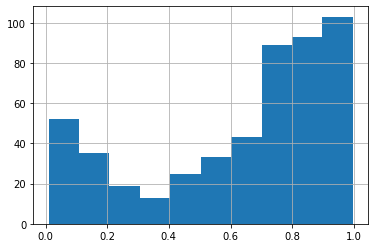

In [4]:
data.df["energy"].hist()

In [5]:
data.preprocess(shuffle=True, remove_duplicates=True)

There were 6 duplicated elements in the dataset, and have been removed from the dataframe


In [6]:
#data.visualize()

In [7]:
data.vif

,variables,VIF
0,danceability,2.796146
1,energy,8.518303
2,speechiness,1.275336
3,acousticness,5.609741
4,instrumentalness,3.728579
5,liveness,1.173207
6,valence,2.314736
7,loudness,7.606633
8,tempo,1.267406
9,key_0,1.340408


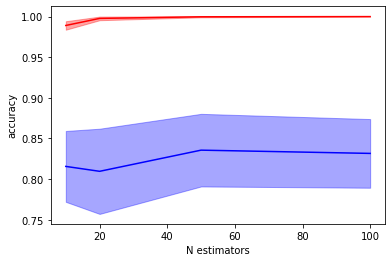

In [8]:
from learning_machine import RandomForest

criterion = [10, 20, 50, 100]
randomforest = RandomForest(data)
randomforest.parameter_search(criterion, k=10)

In [9]:
randomforest._get_best_parameters()
print(randomforest.best_parameters)

{'accuracy': [50, '0.84 ± 0.04'], 'recall': [10, '0.89 ± 0.05'], 'precision': [100, '0.81 ± 0.07'], 'f1': [50, '0.83 ± 0.06']}


In [10]:
df  = randomforest.get_table_with_results()
df

,10 N estimators,20 N estimators,50 N estimators,100 N estimators
Accuracy,81.6±4.4%,81.0±5.2%,83.6±4.5%,83.2±4.2%
Recall,89.5±5.1%,85.9±5.7%,87.0±7.5%,86.0±5.8%
Precision,77.0±6.3%,77.6±9.0%,80.5±6.3%,80.9±7.3%
F1 Score,82.6±4.7%,81.3±6.5%,83.5±6.3%,83.2±5.4%


The model has been trained using 50, whih maximizes the test accuracy to 0.84 ± 0.04
accuracy : 1.0
recall : 1.0
precision : 1.0
F1 : 1.0


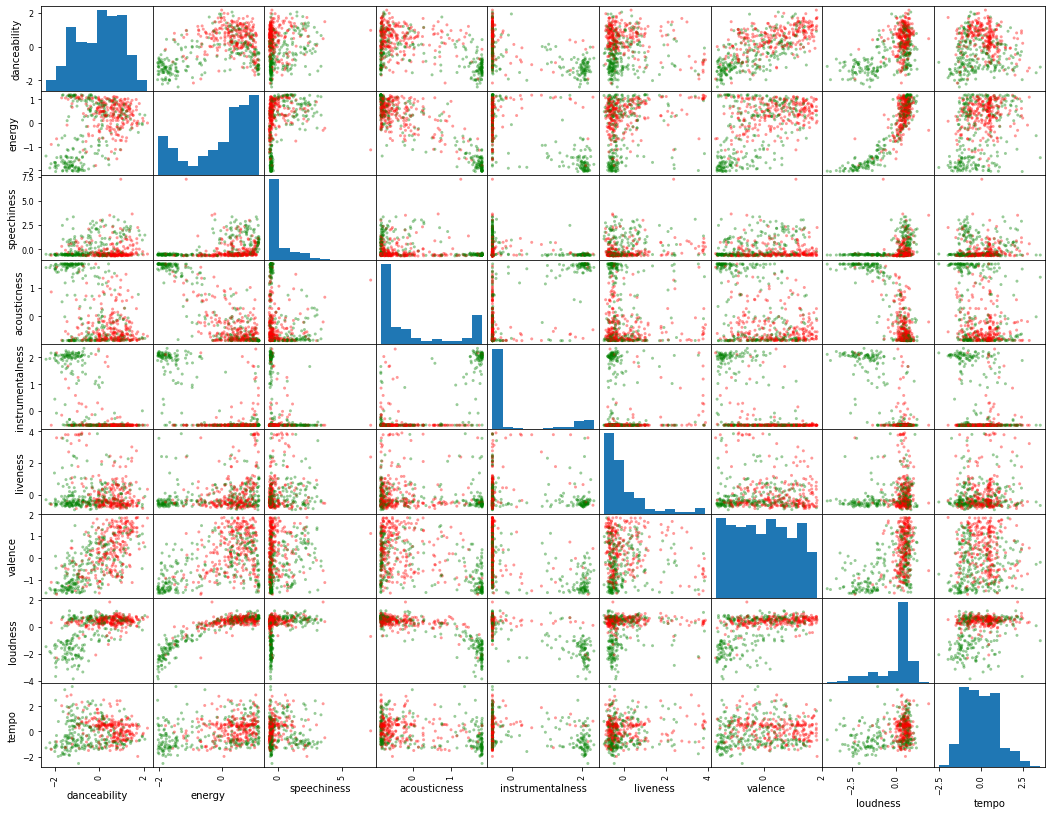

In [11]:
randomforest.fit_all_data_with_best_parameters()

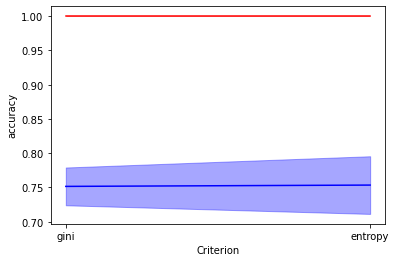

In [12]:
from learning_machine import DecisionTrees

criterion = ["gini", "entropy"]
trees = DecisionTrees(data)
trees.parameter_search(criterion)

The model has been trained using entropy, whih maximizes the test accuracy to 0.75 ± 0.04
accuracy : 1.0
recall : 1.0
precision : 1.0
F1 : 1.0


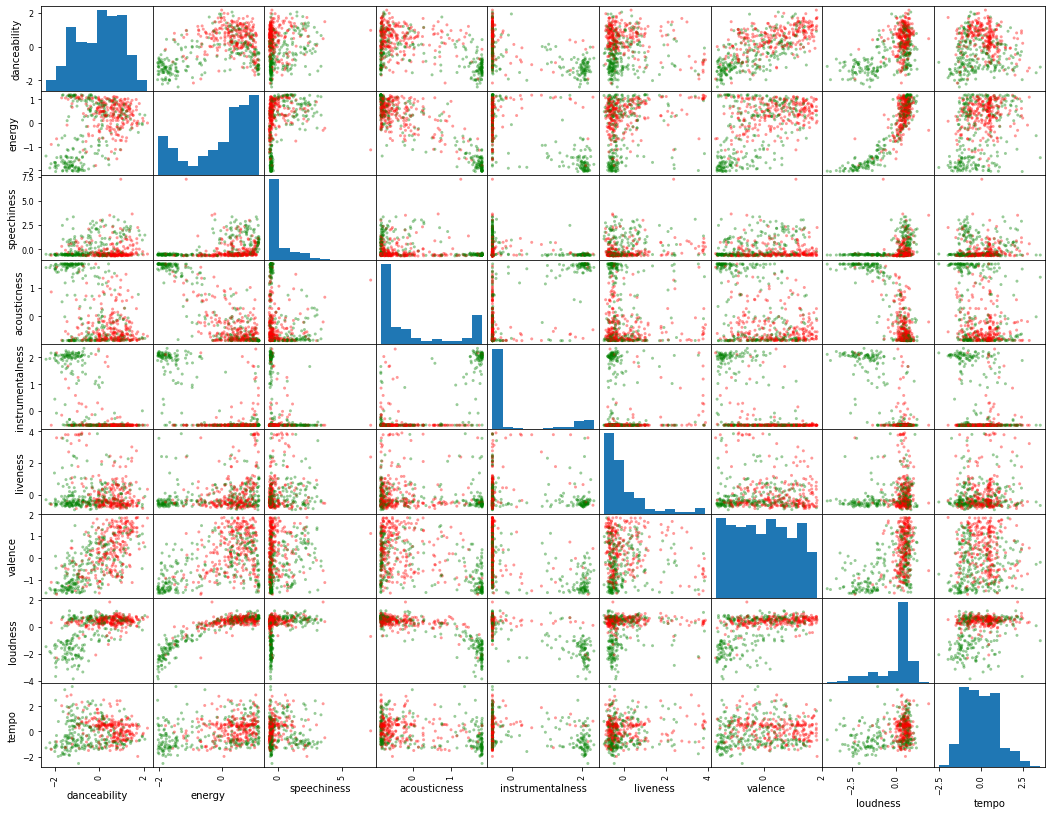

In [13]:
trees.fit_all_data_with_best_parameters()

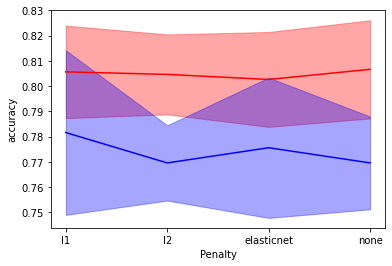

In [14]:
from learning_machine import LogisticRegression

penalty = ["l1", "l2", "elasticnet", "none"]
logistic = LogisticRegression(data)
logistic.parameter_search(penalty)

In [15]:
logistic.fit_all_data_with_best_parameters(visualize=False)

The model has been trained using l1, whih maximizes the test accuracy to 0.78 ± 0.03
accuracy : 0.7955911823647295
recall : 0.844
precision : 0.7700729927007299
F1 : 0.8053435114503817


In [16]:
df = logistic.get_table_with_results()
df

,l1 Penalty,l2 Penalty,elasticnet Penalty,none Penalty
Accuracy,78.2±3.3%,77.0±1.5%,77.6±2.8%,77.0±1.8%
Recall,82.1±4.7%,80.1±1.8%,80.9±3.7%,80.0±2.4%
Precision,76.1±3.1%,75.4±2.6%,75.9±3.1%,75.4±2.8%
F1 Score,78.9±3.3%,77.6±1.6%,78.2±2.9%,77.6±2.2%


In [17]:
from learning_machine import DecisionTrees
tree = DecisionTrees(data)
tree.cross_validation()
print(tree.metrics)

{0: {'Train Accuracy': [1.0, 0.0], 'Test Accuracy': [0.7575571748070123, 0.015072609233793409], 'Train Recall': [1.0, 0.0], 'Test Recall': [0.7336396546922863, 0.031244822047165444], 'Train Precision': [1.0, 0.0], 'Test Precision': [0.7760919220663113, 0.06368632227036987], 'Train F1 Score': [1.0, 0.0], 'Test F1 Score': [0.7513453624564735, 0.01705146357114572]}}


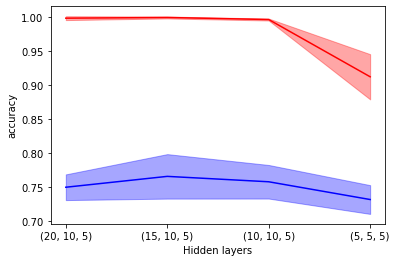

In [18]:
from learning_machine import NeuralNetwork

hidden_layers = [(20,10,5), (15,10,5), (10,10,5), (5,5,5)]
NN = NeuralNetwork(data)
NN.parameter_search(hidden_layers, layers_or_width="both")

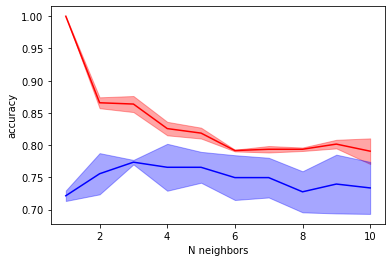

In [19]:
from learning_machine import KNearestNeighbors

Ns = [1,2,3,4,5,6,7,8,9,10]
knearest = KNearestNeighbors(data)
knearest.parameter_search(Ns)


In [20]:
from learning_machine import LDA
lda = LDA(data)
lda.cross_validation()
print(lda.metrics)

{0: {'Train Accuracy': [0.8066409783277253, 0.020188921648170054], 'Test Accuracy': [0.7775773753697425, 0.02581759948138149], 'Train Recall': [0.8675844181322994, 0.01253607407729492], 'Test Recall': [0.8366332497911445, 0.03349255215508063], 'Train Precision': [0.7734706638797736, 0.029426468558792756], 'Test Precision': [0.7482357579341613, 0.029812096987235703], 'Train F1 Score': [0.8177081194158994, 0.021784453565229383], 'Test F1 Score': [0.7896101281576141, 0.02698789198185255]}}


In [21]:
from learning_machine import QDA

qda = QDA(data)
qda.cross_validation(shuffle=True)
print(qda.metrics)
print(qda.fitting_parameters)

{0: {'Train Accuracy': [0.810611816635913, 0.012883678226379537], 'Test Accuracy': [0.7175408219705167, 0.04115814950511975], 'Train Recall': [0.809152055884082, 0.041679553222281014], 'Test Recall': [0.713118994826312, 0.12622123117393663], 'Train Precision': [0.8122122707160697, 0.013672401785450906], 'Test Precision': [0.7296061884669479, 0.04541449260400162], 'Train F1 Score': [0.8099497294567334, 0.01996437465270594], 'Test F1 Score': [0.7121985565921493, 0.05716795443570774]}}
{0: {'priors': None, 'reg_param': 0.0, 'store_covariance': False, 'tol': 0.0001}}


accuracy : 0.8096192384769539
recall : 0.856
precision : 0.7838827838827839
F1 : 0.8183556405353728


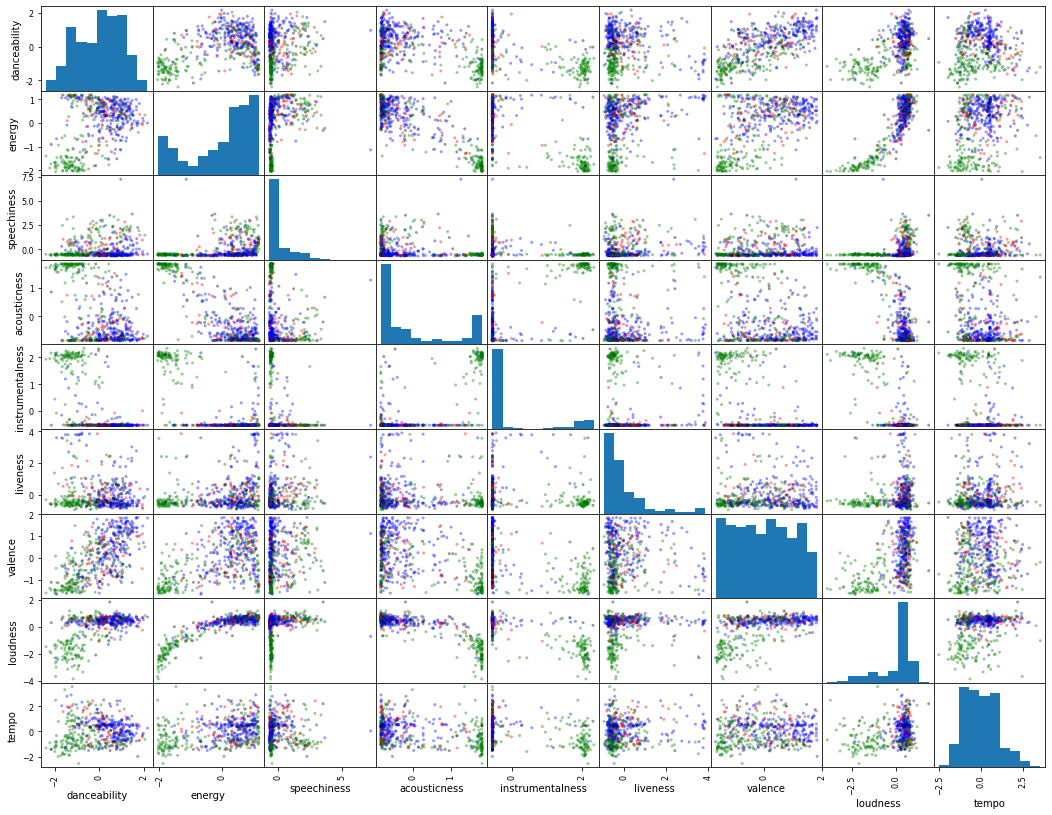

In [22]:
qda.fit_with_all_data()